<a href="https://colab.research.google.com/github/eudoxiamoura/CG-OpenCV/blob/main/Minicurso_FundamentosCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile

In [ ]:
zip_url = "https://github.com/eudoxiamoura/CG-OpenCV/raw/main/ifro.zip"

zip_filename = "repositorio.zip"


print("Baixando o arquivo ZIP...")
response = requests.get(zip_url)
if response.status_code == 200:
    with open(zip_filename, "wb") as file:
        file.write(response.content)
    print(f"Arquivo {zip_filename} baixado com sucesso!")
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


extract_folder = "ifro"
print("Extraindo o arquivo ZIP...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f"Arquivos extraídos para a pasta: {extract_folder}")

# Listar os arquivos extraídos
# print("Arquivos extraídos:")
# for root, dirs, files in os.walk(extract_folder):
#     for name in files:
#         print(os.path.join(root, name))

Baixando o arquivo ZIP...
Arquivo repositorio.zip baixado com sucesso!
Extraindo o arquivo ZIP...
Arquivos extraídos para a pasta: ifro


# Limiarização

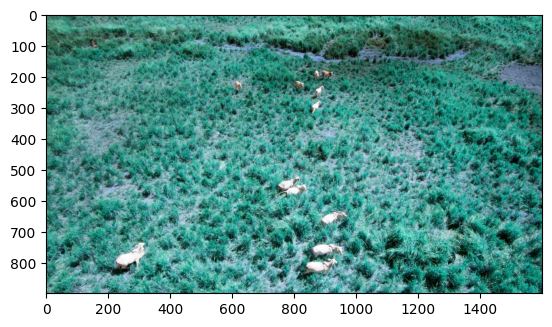

In [ ]:
img = cv2.imread('/content/ifro/ifro/pasto.jpg')
plt.imshow(img)

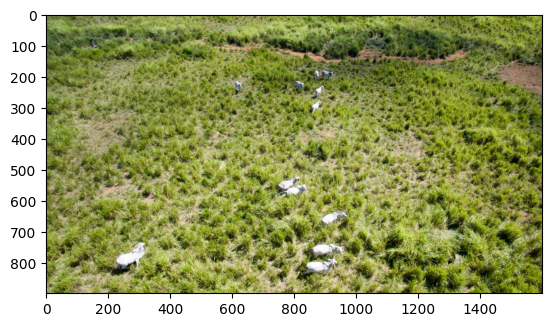

In [ ]:
#converter cinza
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#mostrar imagem
plt.imshow(rgb)

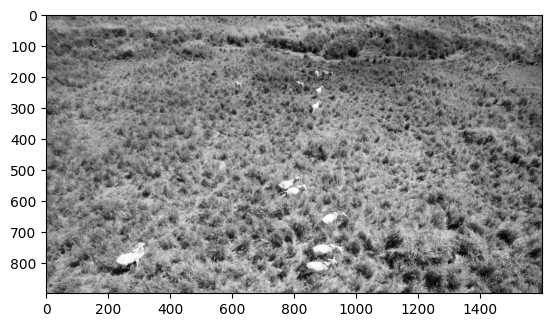

In [ ]:
#converter cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#mostrar imagem
plt.imshow(gray, cmap='gray')

### Binarização

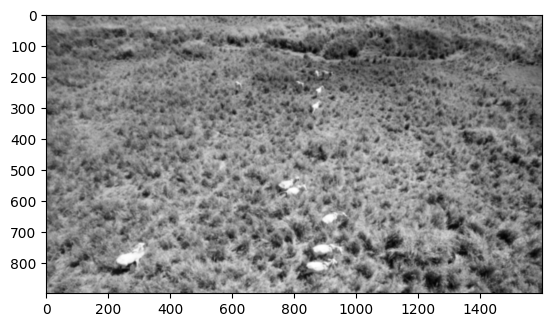

In [ ]:
desfoque = cv2.GaussianBlur(gray, (9,9), 0)
plt.imshow(desfoque, cmap='gray')

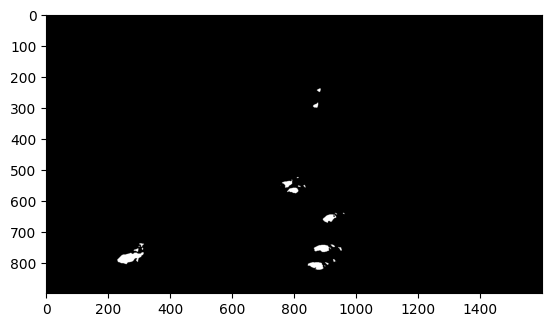

In [ ]:
_, bin = cv2.threshold(desfoque, 230, 255, cv2.THRESH_BINARY) #testar outros THRESH
plt.imshow(bin, cmap='gray')

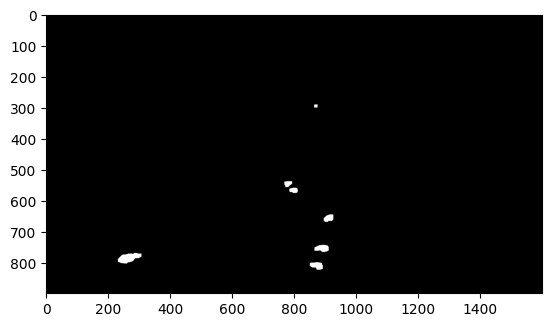

In [ ]:
kernel = np.ones((9, 9), np.uint8)
morph = cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel)
plt.imshow(morph, cmap='gray')

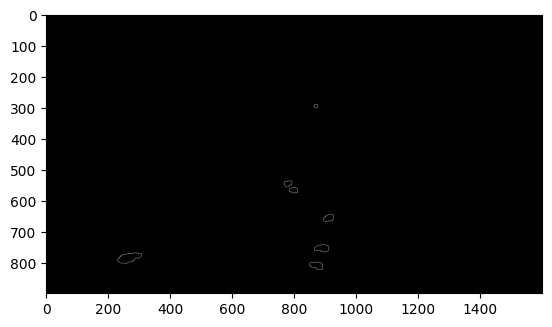

In [ ]:
canny = cv2.Canny(morph, 100, 150)
plt.imshow(canny, cmap='gray')

Animais encontrados: 7


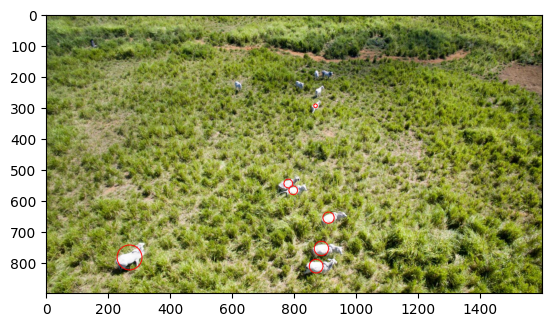

In [ ]:
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contornos = img.copy()
for contorno in contours:
    (x, y), radius = cv2.minEnclosingCircle(contorno)
    center = (int(x), int(y))
    radius = int(radius)

    cv2.circle(img_contornos, center, radius, (0, 0, 255), 2)

img_contornos = cv2.cvtColor(img_contornos, cv2.COLOR_BGR2RGB)

print(f"Animais encontrados: {len(contours)}")

plt.imshow(img_contornos)

Segment Anything Model (SAM): um novo modelo de IA da Meta AI que pode "recortar" qualquer objeto, em qualquer imagem, com um único clique

https://segment-anything.com/